# Fundamentals of Data Analysis Project

**Anthony McGarry**

***

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

# Display the first few rows of the dataset
iris_df.head()

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


### Analysis of Data and Data Types

***

__Sepal Length (cm), Sepal Width (cm), Petal Length (cm), Petal Width (cm):__


__Variable Type:__ Continuous


__Scale of Measurement:__ Ratio Scale


__Explanation__
These variables are continuous numerical measurements that can take any real value within a certain range.
The values have a meaningful zero point, and ratios between values are meaningful. For example, a petal length of 3 cm is twice as long as a petal length of 1.5 cm.


Python Data Type:

In Python, these variables are typically represented as floating-point numbers (float).


__Target (Species):__
Variable Type: Categorical or Qualitative


__Scale of Measurement:__ Nominal Scale


__Explanation__
The target variable represents the species of iris, which is a categorical variable with distinct categories. The categories (Setosa, Versicolor, Virginica) do not have a natural order or ranking.


__Python Data Type:__

In Python, this variable is usually represented as a categorical data type or as integer values (e.g., 0, 1, 2) where each number corresponds to a category.


__Summary:__
Continuous Variables: Sepal Length, Sepal Width, Petal Length, Petal Width

These are measured on a continuous scale and can take any real value.

Categorical Variable: Target (Species)
This is a categorical variable representing the species of iris.


In [63]:
# Summary statistics
summary_stats = iris_df.describe()

# Display summary statistics
summary_stats

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


The output of the code above provides a summary of statistics for each variable, including count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and maximum.

__Count__
Represents the number of observations or data points for each variable. In the Iris dataset, it shows the number of samples for each feature.

__Mean__
Indicates the central tendency of the data. For example, the mean sepal length is the average length of all sepal lengths in the dataset.

__Standard Deviation__
This measures the dispersion or spread of the data. A higher standard deviation indicates greater variability. For instance, a larger standard deviation for petal width suggests more variability in petal width values.

__Minimum and Maximum__
Show the range of values for each variable. For sepal length, it tells us the shortest and longest sepal lengths in the dataset.

__Percentiles (25th, 50th, 75th)__
This represents the values below which a given percentage of observations fall. The 25th percentile (Q1) and 75th percentile (Q3) provide insights into the spread of the middle 50% of the data. The 50th percentile is the median, which is the middle value when the data is sorted.

### Data Plots and Explanations

***

In [64]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = sns.load_dataset("iris")

# Set the style for Seaborn plots
sns.set(style="whitegrid")

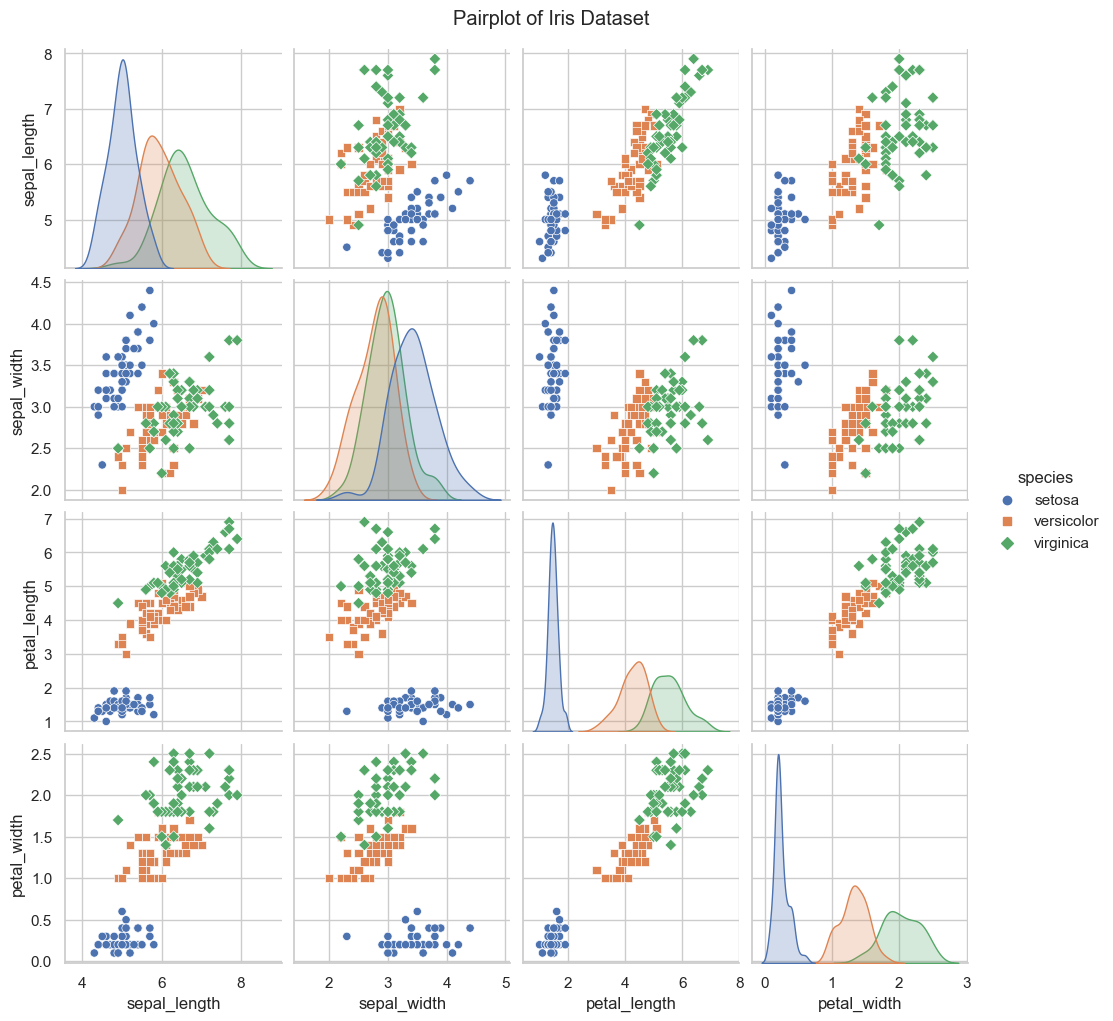

In [65]:
# Pairplot for pairwise relationships and distribution of variables
sns.pairplot(iris_df, hue="species", markers=['o', 's', 'D'])
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

__Pairplot__

Provides a pairwise relationship between different variables along with distribution plots on the diagonal.
Helpful for identifying patterns and relationships between features.

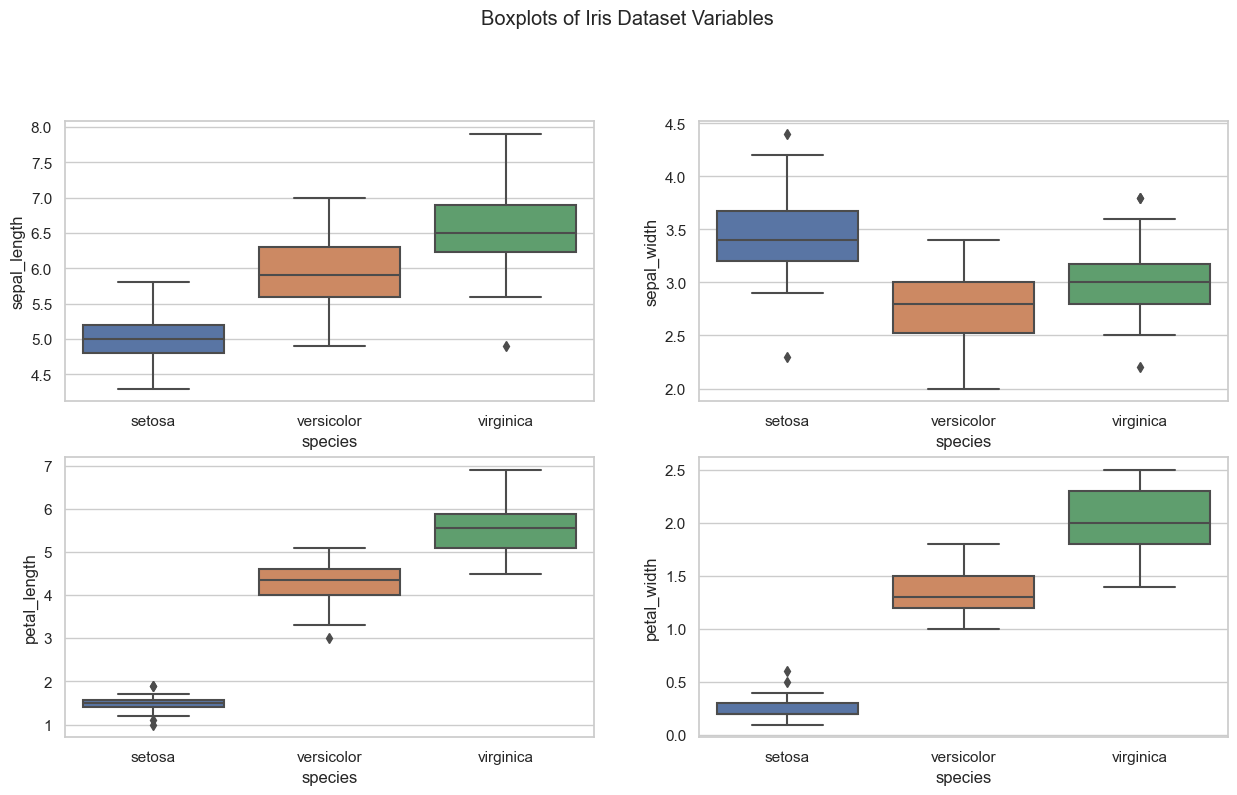

In [66]:
# Boxplot for visualizing the distribution and spread of each variable
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x="species", y="sepal_length", data=iris_df)
plt.subplot(2, 2, 2)
sns.boxplot(x="species", y="sepal_width", data=iris_df)
plt.subplot(2, 2, 3)
sns.boxplot(x="species", y="petal_length", data=iris_df)
plt.subplot(2, 2, 4)
sns.boxplot(x="species", y="petal_width", data=iris_df)
plt.suptitle("Boxplots of Iris Dataset Variables", y=1.02)
plt.show()

__Boxplot__

Visualises the distribution, spread, and potential outliers of each variable across different species.Easily highlights the median, quartiles, and potential outliers.

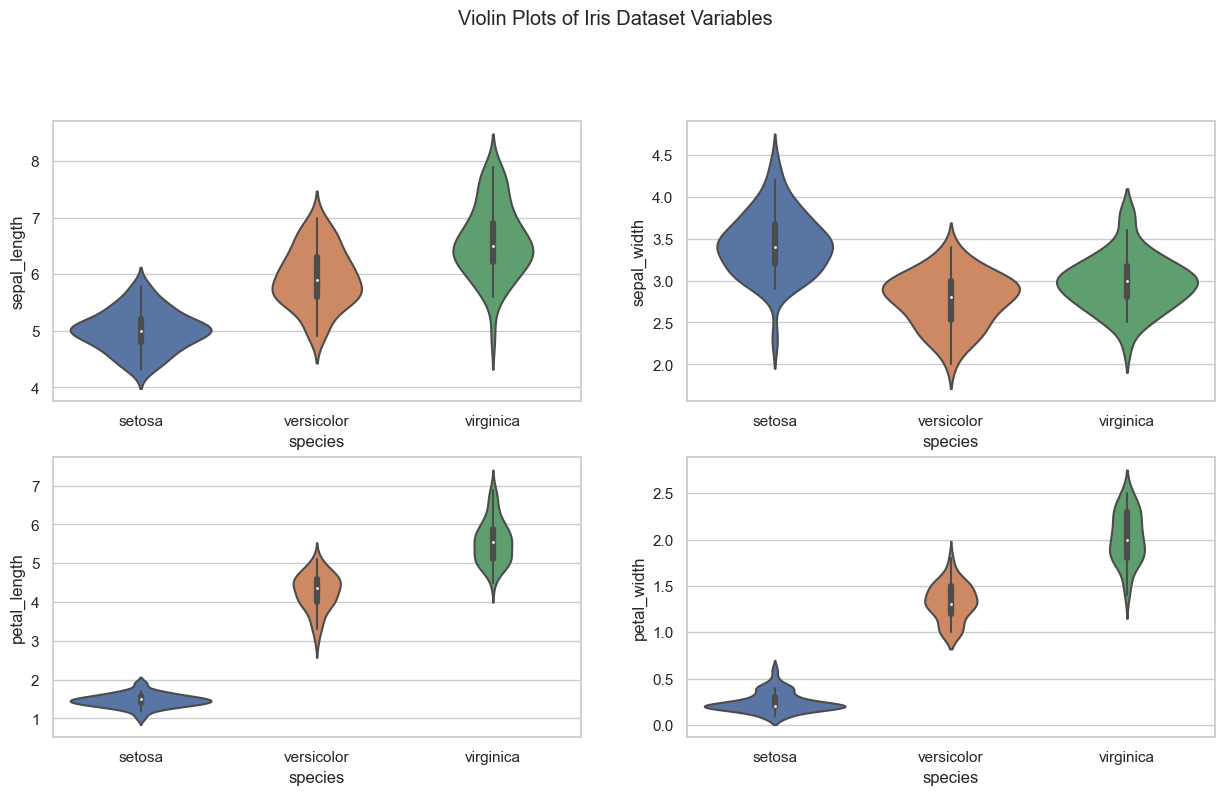

In [67]:
# Violin plot for combining aspects of boxplot and kernel density estimation
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.violinplot(x="species", y="sepal_length", data=iris_df)
plt.subplot(2, 2, 2)
sns.violinplot(x="species", y="sepal_width", data=iris_df)
plt.subplot(2, 2, 3)
sns.violinplot(x="species", y="petal_length", data=iris_df)
plt.subplot(2, 2, 4)
sns.violinplot(x="species", y="petal_width", data=iris_df)
plt.suptitle("Violin Plots of Iris Dataset Variables", y=1.02)
plt.show()

__Violin Plot__

Combines aspects of boxplot and kernel density estimation. Offers insights into the distribution, quartiles, and probability density of each variable.

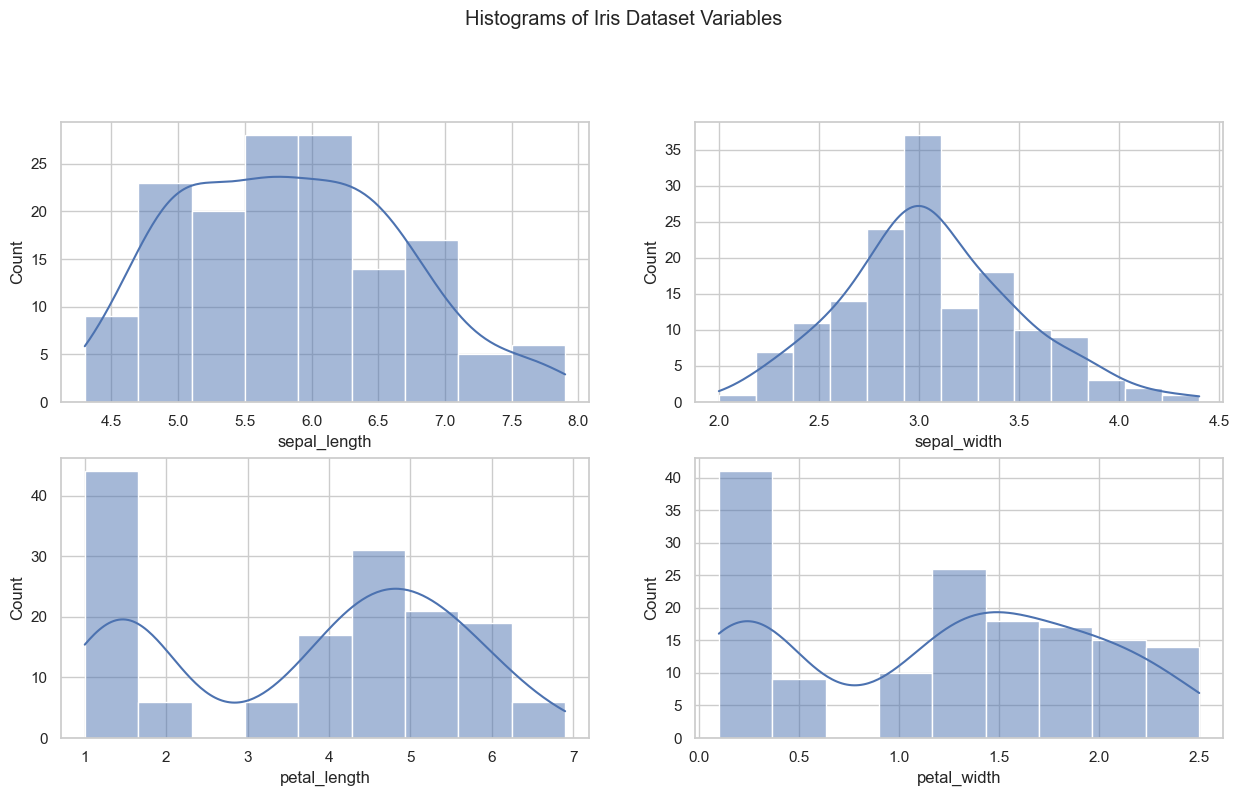

In [68]:
# Histogram for univariate distribution of each variable
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.histplot(iris_df['sepal_length'], kde=True)
plt.subplot(2, 2, 2)
sns.histplot(iris_df['sepal_width'], kde=True)
plt.subplot(2, 2, 3)
sns.histplot(iris_df['petal_length'], kde=True)
plt.subplot(2, 2, 4)
sns.histplot(iris_df['petal_width'], kde=True)
plt.suptitle("Histograms of Iris Dataset Variables", y=1.02)
plt.show()

__Histogram__

Represents the univariate distribution of each variable. Useful for understanding the frequency distribution and shape of the data.

In [69]:
# Calculate the correlation matrix
correlation_matrix = iris_df.corr()

# Display the correlation matrix
print("Correlation Matrix of the Iris dataset:")
print(correlation_matrix)

Correlation Matrix of the Iris dataset:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


C:\Users\anthony.mcgarry\AppData\Local\Temp\ipykernel_20980\82488339.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = iris_df.corr()


### Positive Correlations

Sepal length appears to have a strong positive correlation with petal length (0.87) and petal width (0.82). This suggests that as sepal length increases, petal length and petal width also tend to increase.

Petal length and petal width exhibit a strong positive correlation (0.96), indicating that as petal length increases, petal width also tends to increase.
Negative Correlations:

Sepal width has a moderate negative correlation with petal length (-0.43) and petal width (-0.37). This suggests that as sepal width increases, petal length and petal width tend to decrease.

Sepal length has a moderate negative correlation with sepal width (-0.12), indicating a slight tendency for sepal width to decrease as sepal length increases.

Correlation with the Target Variable (target):

All four feature variables (sepal length, sepal width, petal length, petal width) show a positive correlation with the target variable. This suggests that certain species of iris tend to have larger values for these features. The strongest correlation with the target variable is observed for petal length (0.95), followed by petal width (0.96) and sepal length (0.78).

In [70]:
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

In [71]:
# Select features and target variable
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = (iris_df['target'] == 2).astype(int)  # Classify whether species is Virginica or not (binary classification)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
logistic_reg_model = LogisticRegression(random_state=42)
logistic_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logistic_reg_model.predict(X_test_scaled)

In [73]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_rep)
print('\nConfusion Matrix:\n', conf_matrix)

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[19  0]
 [ 0 11]]


Performance measures are used to evaluate the effectiveness of classifiers on different datasets with different characteristics. For classification problems, there are three main measures for evaluating the model, the precision(the accuracy of positive predictions or the number of most relevant values from retrieved values.), Recall(ratio of positive instances that are truly detected by the classifier), and confusion matrix.

The scores are good in this case. When precision is high for a given model the ability to perform positive predictions from the total number of positives will increase. When the recall is high, it means that model can recognise most of the positive classes from the entire set of positive samples.

### Reference
> https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

> https://eminebozkus.medium.com/exploring-the-iris-flower-dataset-4e000bcc266c

> https://www.angela1c.com/projects/iris_project/the-iris-dataset/

***

End